<a href="https://colab.research.google.com/github/mozzaquatro/financial_market/blob/main/AT_Definindo_intervalos%2C_calculando_e_plotando_m%C3%A9dias_m%C3%B3veis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. importando bibliotecas

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as web

!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf
yf.pdr_override()

!pip install --upgrade mplfinance
import mplfinance as mpf

#!pip install mpl_finance --upgrade --no-cache-dir
#from mpl_finance import candlestick_ohlc

obtendo os dados do mercado

In [105]:
ticket = yf.Ticker('USIM5.SA')
#ibov = web.get_data_yahoo(ticket)
#print(ibov.shape)
##print(ticket.info)
data = ticket.history(period='70d')
data
data.columns = map(str.lower, data.columns)
data

,open,high,low,close,volume,dividends,stock splits
Date,,,,,,,
2021-08-31,17.478868,17.478868,17.083759,17.394201,24223900,0.000000,0
2021-09-01,17.120001,17.280001,16.660000,17.000000,28233400,1.095799,0
2021-09-02,17.010000,17.309999,16.180000,16.230000,34201500,0.000000,0
2021-09-03,16.660000,16.799999,16.129999,16.280001,22083600,0.000000,0
2021-09-06,15.910000,16.680000,15.830000,16.540001,11386000,0.000000,0
...,...,...,...,...,...,...,...
2021-12-06,14.530000,14.820000,14.150000,14.780000,20378100,0.000000,0
2021-12-07,15.360000,15.510000,14.850000,14.920000,25106000,0.000000,0
2021-12-08,15.050000,15.330000,14.800000,15.050000,12410000,0.000000,0


KeyError: ignored

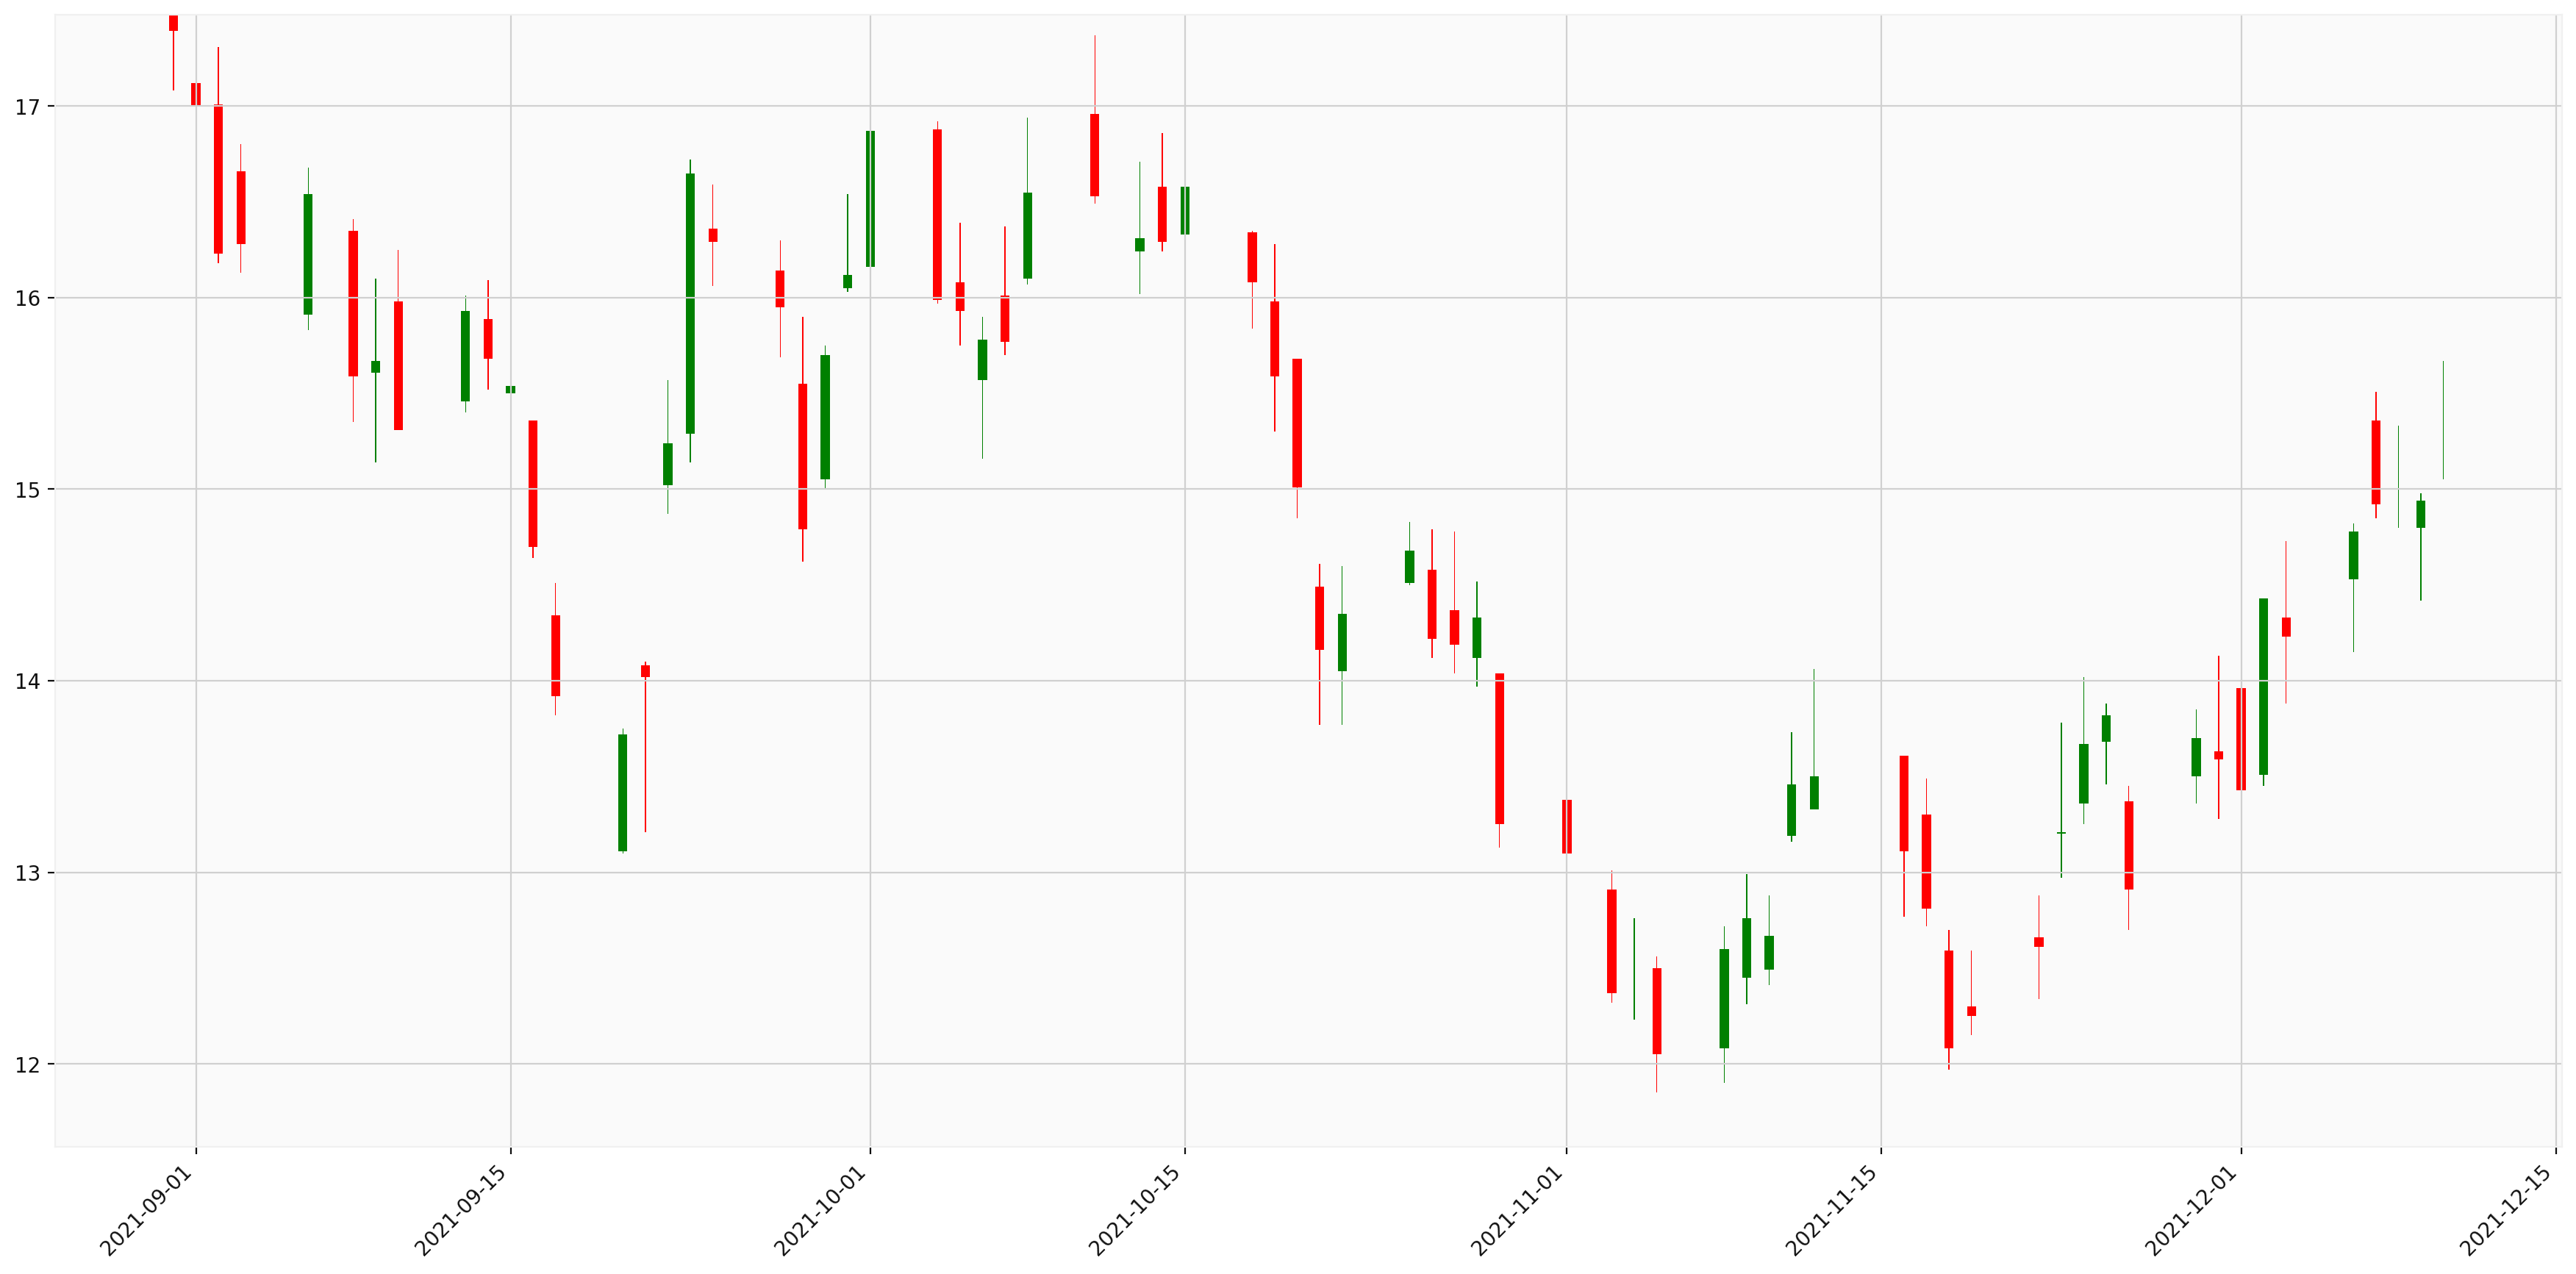

In [111]:
#create figure
plt.figure(figsize=(22,10),dpi=200)

#define width of candlestick elements
width = .4
width2 = .05

#define up and down prices
up = data[data.close>=data.open]
down = data[data.close<data.open]

#define colors to use
col1 = 'green'
col2 = 'red'

#plot up prices
plt.bar(up.index,up.close-up.open,width,bottom=up.open,color=col1)
plt.bar(up.index,up.high-up.close,width2,bottom=up.close,color=col1)
plt.bar(up.index,up.low-up.open,width2,bottom=up.open,color=col1)

#plot down prices
plt.bar(down.index,down.close-down.open,width,bottom=down.open,color=col2)
plt.bar(down.index,down.high-down.open,width2,bottom=down.open,color=col2)
plt.bar(down.index,down.low-down.close,width2,bottom=down.close,color=col2)

#rotate x-axis tick labels
plt.xticks(rotation=45, ha='right')

data["Close"].rolling(21).mean().plot(label="MM21")
data["Close"].rolling(200).mean().plot(label="MM200")
data['Close'].ewm(9).mean().plot(label="EWM9")


#display candlestick chart
plt.show()

In [110]:
data["Close"].rolling(21).mean().plot(label="MM21")
data["Close"].rolling(200).mean().plot(label="MM200")
data['Close'].ewm(9).mean().plot(label="EWM9")
plt.legend()


KeyError: ignored

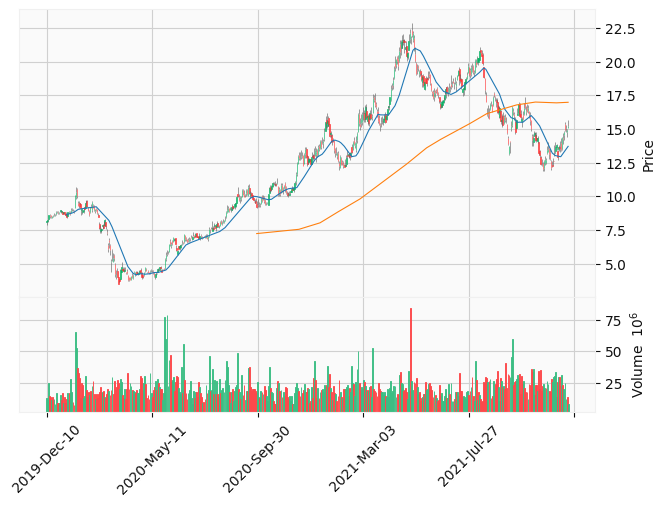

In [67]:
mpf.plot(data,type='candle',mav=(20, 200),volume=True,style='yahoo')

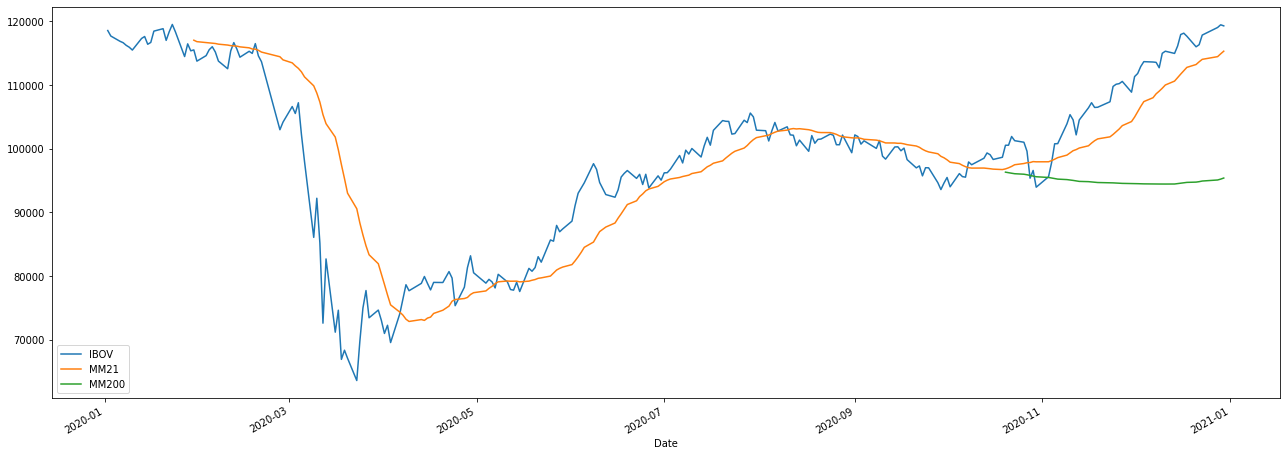

In [ ]:
ibov_fatiado = ibov[ibov.index.year == 2020]
ibov_fatiado["Close"].plot(figsize=(22,8),label="IBOV")
ibov_fatiado["Close"].rolling(21).mean().plot(label="MM21")
ibov_fatiado["Close"].rolling(200).mean().plot(label="MM200")
plt.legend()

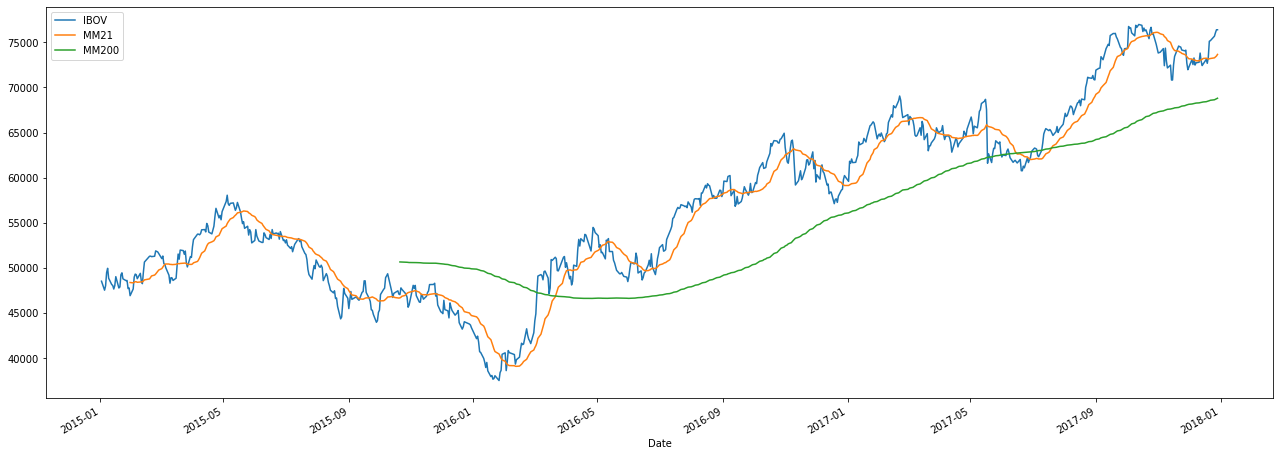

In [ ]:
ibov_fatiado = ibov[(ibov.index.year >= 2015) & (ibov.index.year <= 2017)]
ibov_fatiado["Close"].plot(figsize=(22,8),label="IBOV")
ibov_fatiado["Close"].rolling(21).mean().plot(label="MM21")
ibov_fatiado["Close"].rolling(200).mean().plot(label="MM200")
plt.legend()